In [24]:
from keras.models import load_model
from sklearn import datasets
import pandas as pd
digits = pd.read_csv("spambase.data", header=None)

In [25]:
print(digits)

        0     1     2    3     4     5     6     7     8     9   ...     48  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4596  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4598  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4599  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4600  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50     51     52     53     54   55  

In [26]:
digits.rename(columns = {57:'label'}, inplace=True)

In [27]:
print(digits)

         0     1     2    3     4     5     6     7     8     9  ...     48  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4596  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4598  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4599  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4600  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50     51     52     53     54   55  

In [28]:
print(digits[['label']])

      label
0         1
1         1
2         1
3         1
4         1
...     ...
4596      0
4597      0
4598      0
4599      0
4600      0

[4601 rows x 1 columns]


In [29]:
from numpy.random import RandomState

rng = RandomState()

train = digits.sample(frac=0.7, random_state=rng)
test = digits.loc[~digits.index.isin(train.index)]

In [30]:
print(train)
print(train[['label']])

         0     1     2    3     4    5     6     7     8    9  ...   48  \
170   0.52  0.00  2.38  0.0  0.26  0.0  0.26  0.00  0.52  0.0  ...  0.0   
3661  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.0  ...  0.0   
4532  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.0  ...  0.0   
4549  0.00  0.00  0.00  0.0  0.00  0.8  0.00  0.00  0.80  0.0  ...  0.0   
654   0.33  0.00  0.33  0.0  0.00  0.0  0.66  0.00  0.00  0.0  ...  0.0   
...    ...   ...   ...  ...   ...  ...   ...   ...   ...  ...  ...  ...   
3611  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.0  ...  0.0   
998   0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.0  ...  0.0   
4543  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.0  ...  0.0   
548   0.26  1.07  0.00  0.0  1.61  0.0  1.07  0.26  0.26  0.0  ...  0.0   
1890  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.0  ...  0.0   

         49   50     51     52     53     54  55   56  label  
170   0.656  0.0  0.310  0.000  0.00

In [31]:
print(test)

         0    1     2    3     4     5     6     7     8     9  ...    48  \
2     0.06  0.0  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
6     0.00  0.0  0.00  0.0  1.92  0.00  0.00  0.00  0.00  0.64  ...  0.00   
7     0.00  0.0  0.00  0.0  1.88  0.00  0.00  1.88  0.00  0.00  ...  0.00   
13    0.00  0.0  0.00  0.0  0.90  0.00  0.90  0.00  0.00  0.90  ...  0.00   
14    0.00  0.0  1.42  0.0  0.71  0.35  0.00  0.35  0.00  0.71  ...  0.00   
...    ...  ...   ...  ...   ...   ...   ...   ...   ...   ...  ...   ...   
4583  0.00  0.0  1.23  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
4587  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
4590  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
4592  0.00  0.0  1.25  0.0  2.50  0.00  0.00  0.00  0.00  0.00  ...  0.00   
4596  0.31  0.0  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.00   

         49     50     51     52     53     54   55    56  label  
2     0.

In [32]:
train_label = train.iloc[:,-1]
test_label = test.iloc[:,-1]

In [33]:
train = train.drop(['label'], axis=1)

test = test.drop(['label'], axis=1)

In [34]:
print(train)

        0     1     2    3     4    5     6     7     8    9   ...   47   48  \
170   0.52  0.00  2.38  0.0  0.26  0.0  0.26  0.00  0.52  0.0  ...  0.0  0.0   
3661  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.0  ...  0.0  0.0   
4532  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.0  ...  0.0  0.0   
4549  0.00  0.00  0.00  0.0  0.00  0.8  0.00  0.00  0.80  0.0  ...  0.0  0.0   
654   0.33  0.00  0.33  0.0  0.00  0.0  0.66  0.00  0.00  0.0  ...  0.0  0.0   
...    ...   ...   ...  ...   ...  ...   ...   ...   ...  ...  ...  ...  ...   
3611  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.0  ...  0.0  0.0   
998   0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.0  ...  0.0  0.0   
4543  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.0  ...  0.0  0.0   
548   0.26  1.07  0.00  0.0  1.61  0.0  1.07  0.26  0.26  0.0  ...  0.0  0.0   
1890  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.0  ...  0.0  0.0   

         49   50     51     52     53  

In [35]:
print(test)

        0    1     2    3     4     5     6     7     8     9   ...   47  \
2     0.06  0.0  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.0   
6     0.00  0.0  0.00  0.0  1.92  0.00  0.00  0.00  0.00  0.64  ...  0.0   
7     0.00  0.0  0.00  0.0  1.88  0.00  0.00  1.88  0.00  0.00  ...  0.0   
13    0.00  0.0  0.00  0.0  0.90  0.00  0.90  0.00  0.00  0.90  ...  0.0   
14    0.00  0.0  1.42  0.0  0.71  0.35  0.00  0.35  0.00  0.71  ...  0.0   
...    ...  ...   ...  ...   ...   ...   ...   ...   ...   ...  ...  ...   
4583  0.00  0.0  1.23  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0   
4587  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0   
4590  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0   
4592  0.00  0.0  1.25  0.0  2.50  0.00  0.00  0.00  0.00  0.00  ...  0.0   
4596  0.31  0.0  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.0   

        48     49     50     51     52     53     54   55    56  
2     0.01  0.143  0.

In [36]:
print(train_label)
print(test_label)

170     1
3661    0
4532    0
4549    0
654     1
       ..
3611    0
998     1
4543    0
548     1
1890    0
Name: label, Length: 3221, dtype: int64
2       1
6       1
7       1
13      1
14      1
       ..
4583    0
4587    0
4590    0
4592    0
4596    0
Name: label, Length: 1380, dtype: int64


In [37]:
mean = train.mean(axis = 0)
train -= mean
std = train.std(axis = 0)
train/= std
test -=mean
test/=std

In [38]:
x_val = train[:1000]
partial_x_train = train[1000:]
y_val = train_label[:1000]
partial_y_train = train_label[1000:]

In [39]:
print(partial_x_train.shape)

(2221, 57)


In [40]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu',input_shape=(57,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [41]:
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [42]:
history = model.fit(partial_x_train,partial_y_train,epochs = 20,batch_size = 512, validation_data = (x_val,y_val))
model.save("file1.h5")

Train on 2221 samples, validate on 1000 samples
Epoch 1/20
2221/2221 [==============================] - 1s 290us/step - loss: 0.6584 - accuracy: 0.6276 - val_loss: 0.6194 - val_accuracy: 0.7410
Epoch 2/20
2221/2221 [==============================] - 0s 22us/step - loss: 0.6013 - accuracy: 0.7528 - val_loss: 0.5766 - val_accuracy: 0.7870
Epoch 3/20
2221/2221 [==============================] - 0s 22us/step - loss: 0.5629 - accuracy: 0.7969 - val_loss: 0.5415 - val_accuracy: 0.8200
Epoch 4/20
2221/2221 [==============================] - 0s 20us/step - loss: 0.5299 - accuracy: 0.8222 - val_loss: 0.5114 - val_accuracy: 0.8440
Epoch 5/20
2221/2221 [==============================] - 0s 24us/step - loss: 0.5011 - accuracy: 0.8361 - val_loss: 0.4828 - val_accuracy: 0.8600
Epoch 6/20
2221/2221 [==============================] - 0s 23us/step - loss: 0.4735 - accuracy: 0.8465 - val_loss: 0.4570 - val_accuracy: 0.8670
Epoch 7/20
2221/2221 [==============================] - 0s 22us/step - loss: 0.44

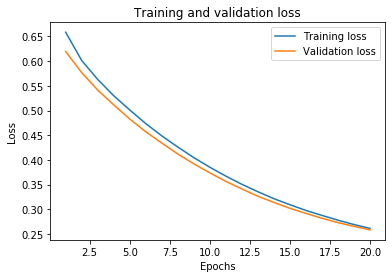

In [43]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

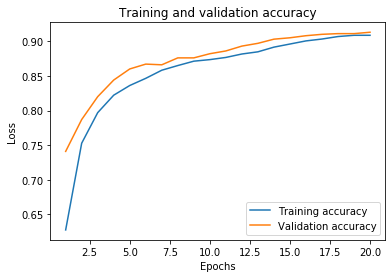

In [44]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,acc,label='Training accuracy')
plt.plot(epochs,val_acc,label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
var = load_model("file1.h5")
result =var.evaluate(test,test_label)
res = model.evaluate(test, test_label)
print(result)

1380/1380 [==============================] - 0s 48us/step
[0.2742887070213539, 0.9144927263259888]
